In [2]:
!kaggle competitions download -c recruit-restaurant-visitor-forecasting

recruit-restaurant-visitor-forecasting.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import yaml
with open('../config/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import shutil
from zipfile import ZipFile

In [5]:

'''

api=KaggleApi()
api.authenticate()

output_path=config['train_path']

api.competition_download_file('recruit-restaurant-visitor-forecasting',
    'air_reserve.csv.zip', path=output_path)

shutil.unpack_archive(config['train_path']+'/'+'recruit-restaurant-visitor-forecasting.zip',config['train_path'])



from zipfile import ZipFile

files = glob.glob(os.path.join(config['train_path'], '*zip'))
for item in files:
    with ZipFile(item) as zip_file:
        zip_file.extractall(config['train_path'])

zip_files = glob.glob(os.path.join(config['train_path'], '*.zip'))
for zip_file in zip_files:
    os.remove(zip_file)
    print(f"{zip_file}を削除しました。")


'''


'\n\napi=KaggleApi()\napi.authenticate()\n\noutput_path=config[\'train_path\']\n\napi.competition_download_file(\'recruit-restaurant-visitor-forecasting\',\n    \'air_reserve.csv.zip\', path=output_path)\n\nshutil.unpack_archive(config[\'train_path\']+\'/\'+\'recruit-restaurant-visitor-forecasting.zip\',config[\'train_path\'])\n\n\n\nfrom zipfile import ZipFile\n\nfiles = glob.glob(os.path.join(config[\'train_path\'], \'*zip\'))\nfor item in files:\n    with ZipFile(item) as zip_file:\n        zip_file.extractall(config[\'train_path\'])\n\nzip_files = glob.glob(os.path.join(config[\'train_path\'], \'*.zip\'))\nfor zip_file in zip_files:\n    os.remove(zip_file)\n    print(f"{zip_file}を削除しました。")\n\n\n'

In [6]:
df={}

files = glob.glob(os.path.join(config['train_path'], '*.csv'))
for item in files:
    file_name = os.path.basename(item)  # ファイル名のみを取得
    file_name_without_ext = os.path.splitext(file_name)[0]  # 拡張子を除いたファイル名
    print(f"読み込み中: {file_name}")
    df[file_name_without_ext] = pd.read_csv(item)


読み込み中: hpg_reserve.csv
読み込み中: air_reserve.csv
読み込み中: date_info.csv
読み込み中: air_store_info.csv
読み込み中: store_id_relation.csv
読み込み中: hpg_store_info.csv
読み込み中: sample_submission.csv
読み込み中: air_visit_data.csv


In [7]:
air=pd.merge(df['air_reserve'],df['air_store_info'],on='air_store_id')
hpg=pd.merge(df['hpg_reserve'],df['hpg_store_info'],on='hpg_store_id')

In [8]:
air_rel=pd.merge(air,df['store_id_relation'],how='left',on='air_store_id')
hpg_rel=pd.merge(hpg,df['store_id_relation'],how='left',on='hpg_store_id')
full = pd.merge(air_rel, hpg_rel, how='outer')

In [9]:
#日付型に変更する
full['visit_datetime']=pd.to_datetime(full['visit_datetime'])
full['reserve_datetime']=pd.to_datetime(full['reserve_datetime'])

In [10]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963686 entries, 0 to 963685
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   air_store_id      105906 non-null  object        
 1   visit_datetime    963686 non-null  datetime64[ns]
 2   reserve_datetime  963686 non-null  datetime64[ns]
 3   reserve_visitors  963686 non-null  int64         
 4   air_genre_name    92378 non-null   object        
 5   air_area_name     92378 non-null   object        
 6   latitude          963686 non-null  float64       
 7   longitude         963686 non-null  float64       
 8   hpg_store_id      907572 non-null  object        
 9   hpg_genre_name    871308 non-null  object        
 10  hpg_area_name     871308 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 80.9+ MB


In [11]:
full['visit_year'] = pd.Series(full.visit_datetime.dt.year)
full['visit_month']  = pd.Series(full.visit_datetime.dt.month)
full['visit_date'] = pd.Series(full.visit_datetime.dt.day)
full['visit_weekday'] = pd.Series(full.visit_datetime.dt.weekday)
full['visit_time'] = pd.Series(full.visit_datetime.dt.time)
full['reserve_year'] = pd.Series(full.reserve_datetime.dt.year)
full['reserve_month']  = pd.Series(full.reserve_datetime.dt.month)
full['reserve_date'] = pd.Series(full.reserve_datetime.dt.day)
full['reserve_weekday'] = pd.Series(full.reserve_datetime.dt.weekday)
full['reserve_time'] = pd.Series(full.reserve_datetime.dt.time)

full


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,hpg_store_id,hpg_genre_name,...,visit_year,visit_month,visit_date,visit_weekday,visit_time,reserve_year,reserve_month,reserve_date,reserve_weekday,reserve_time
0,air_00a91d42b08b08d9,2016-10-31 20:00:00,2016-10-31 16:00:00,2,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc,NaN,...,2016,10,31,0,20:00:00,2016,10,31,0,16:00:00
1,air_00a91d42b08b08d9,2016-12-05 19:00:00,2016-12-01 15:00:00,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc,NaN,...,2016,12,5,0,19:00:00,2016,12,1,3,15:00:00
2,air_00a91d42b08b08d9,2016-12-14 19:00:00,2016-12-08 10:00:00,18,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc,NaN,...,2016,12,14,2,19:00:00,2016,12,8,3,10:00:00
3,air_00a91d42b08b08d9,2016-12-17 19:00:00,2016-12-11 16:00:00,2,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc,NaN,...,2016,12,17,5,19:00:00,2016,12,11,6,16:00:00
4,air_00a91d42b08b08d9,2016-12-20 20:00:00,2016-12-18 17:00:00,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc,NaN,...,2016,12,20,1,20:00:00,2016,12,18,6,17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963681,NaN,2017-05-31 19:00:00,2017-04-17 21:00:00,3,NaN,NaN,34.405829,132.453738,hpg_13776b7dde4818cf,Creative Japanese food,...,2017,5,31,2,19:00:00,2017,4,17,0,21:00:00
963682,NaN,2017-05-31 19:00:00,2017-04-18 01:00:00,4,NaN,NaN,35.691384,139.701256,hpg_ba19e6108767ebb6,Spain Bar/Italian Bar,...,2017,5,31,2,19:00:00,2017,4,18,1,01:00:00
963683,NaN,2017-05-31 19:00:00,2017-04-22 00:00:00,2,NaN,NaN,34.392106,132.461914,hpg_b8c39e61f5461e6e,Japanese style,...,2017,5,31,2,19:00:00,2017,4,22,5,00:00:00
963684,NaN,2017-05-31 21:00:00,2017-04-19 17:00:00,9,NaN,NaN,34.692109,135.191698,hpg_fae6c96189b4a122,Japanese food in general,...,2017,5,31,2,21:00:00,2017,4,19,2,17:00:00


In [12]:
full['air_store_id'] = full['air_store_id'].fillna('0')
full['hpg_store_id'] = full['hpg_store_id'].fillna('0')
full['air_genre_name'] = full['air_genre_name'].fillna('0')
full['hpg_genre_name'] = full['hpg_genre_name'].fillna('0')

In [19]:
# Now lets put our data in order
# Create column 'store_id', where all ids from two sources will be collected together
full.loc[(full['air_genre_name'] != '0'), 'store_id'] = full['air_store_id']
full.loc[(full['air_genre_name'] == '0'), 'store_id'] = full['hpg_store_id']

# Create column 'store_genre_name', where all genres of restaurants will be collected together
full.loc[(full['air_genre_name'] != '0'), 'store_genre_name'] = full['air_genre_name']
full.loc[(full['air_genre_name'] == '0'), 'store_genre_name'] = full['hpg_genre_name']

# Create column 'air_hpg_link', to save connection between restaurants that are in both sources
full.loc[(full['air_store_id'] != '0') & (full['hpg_genre_name'] != '0'), 'air_hpg_link'] = full['air_store_id']
full.loc[(full['air_store_id'] != '0') & (full['hpg_genre_name'] == '0'), 'air_hpg_link'] = full['hpg_store_id']

# Create column 'store_genre_name', where all genres of restaurants will be collected together
full.loc[(full['air_genre_name'] != '0'), 'area_name'] = full['air_area_name']
full.loc[(full['air_genre_name'] == '0'), 'area_name'] = full['hpg_area_name']

full['air_hpg_link'] = full['air_hpg_link'].fillna('0')


full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963686 entries, 0 to 963685
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   air_store_id      963686 non-null  object        
 1   visit_datetime    963686 non-null  datetime64[ns]
 2   reserve_datetime  963686 non-null  datetime64[ns]
 3   reserve_visitors  963686 non-null  int64         
 4   air_genre_name    963686 non-null  object        
 5   air_area_name     92378 non-null   object        
 6   latitude          963686 non-null  float64       
 7   longitude         963686 non-null  float64       
 8   hpg_store_id      963686 non-null  object        
 9   hpg_genre_name    963686 non-null  object        
 10  hpg_area_name     871308 non-null  object        
 11  visit_year        963686 non-null  int32         
 12  visit_month       963686 non-null  int32         
 13  visit_date        963686 non-null  int32         
 14  visi

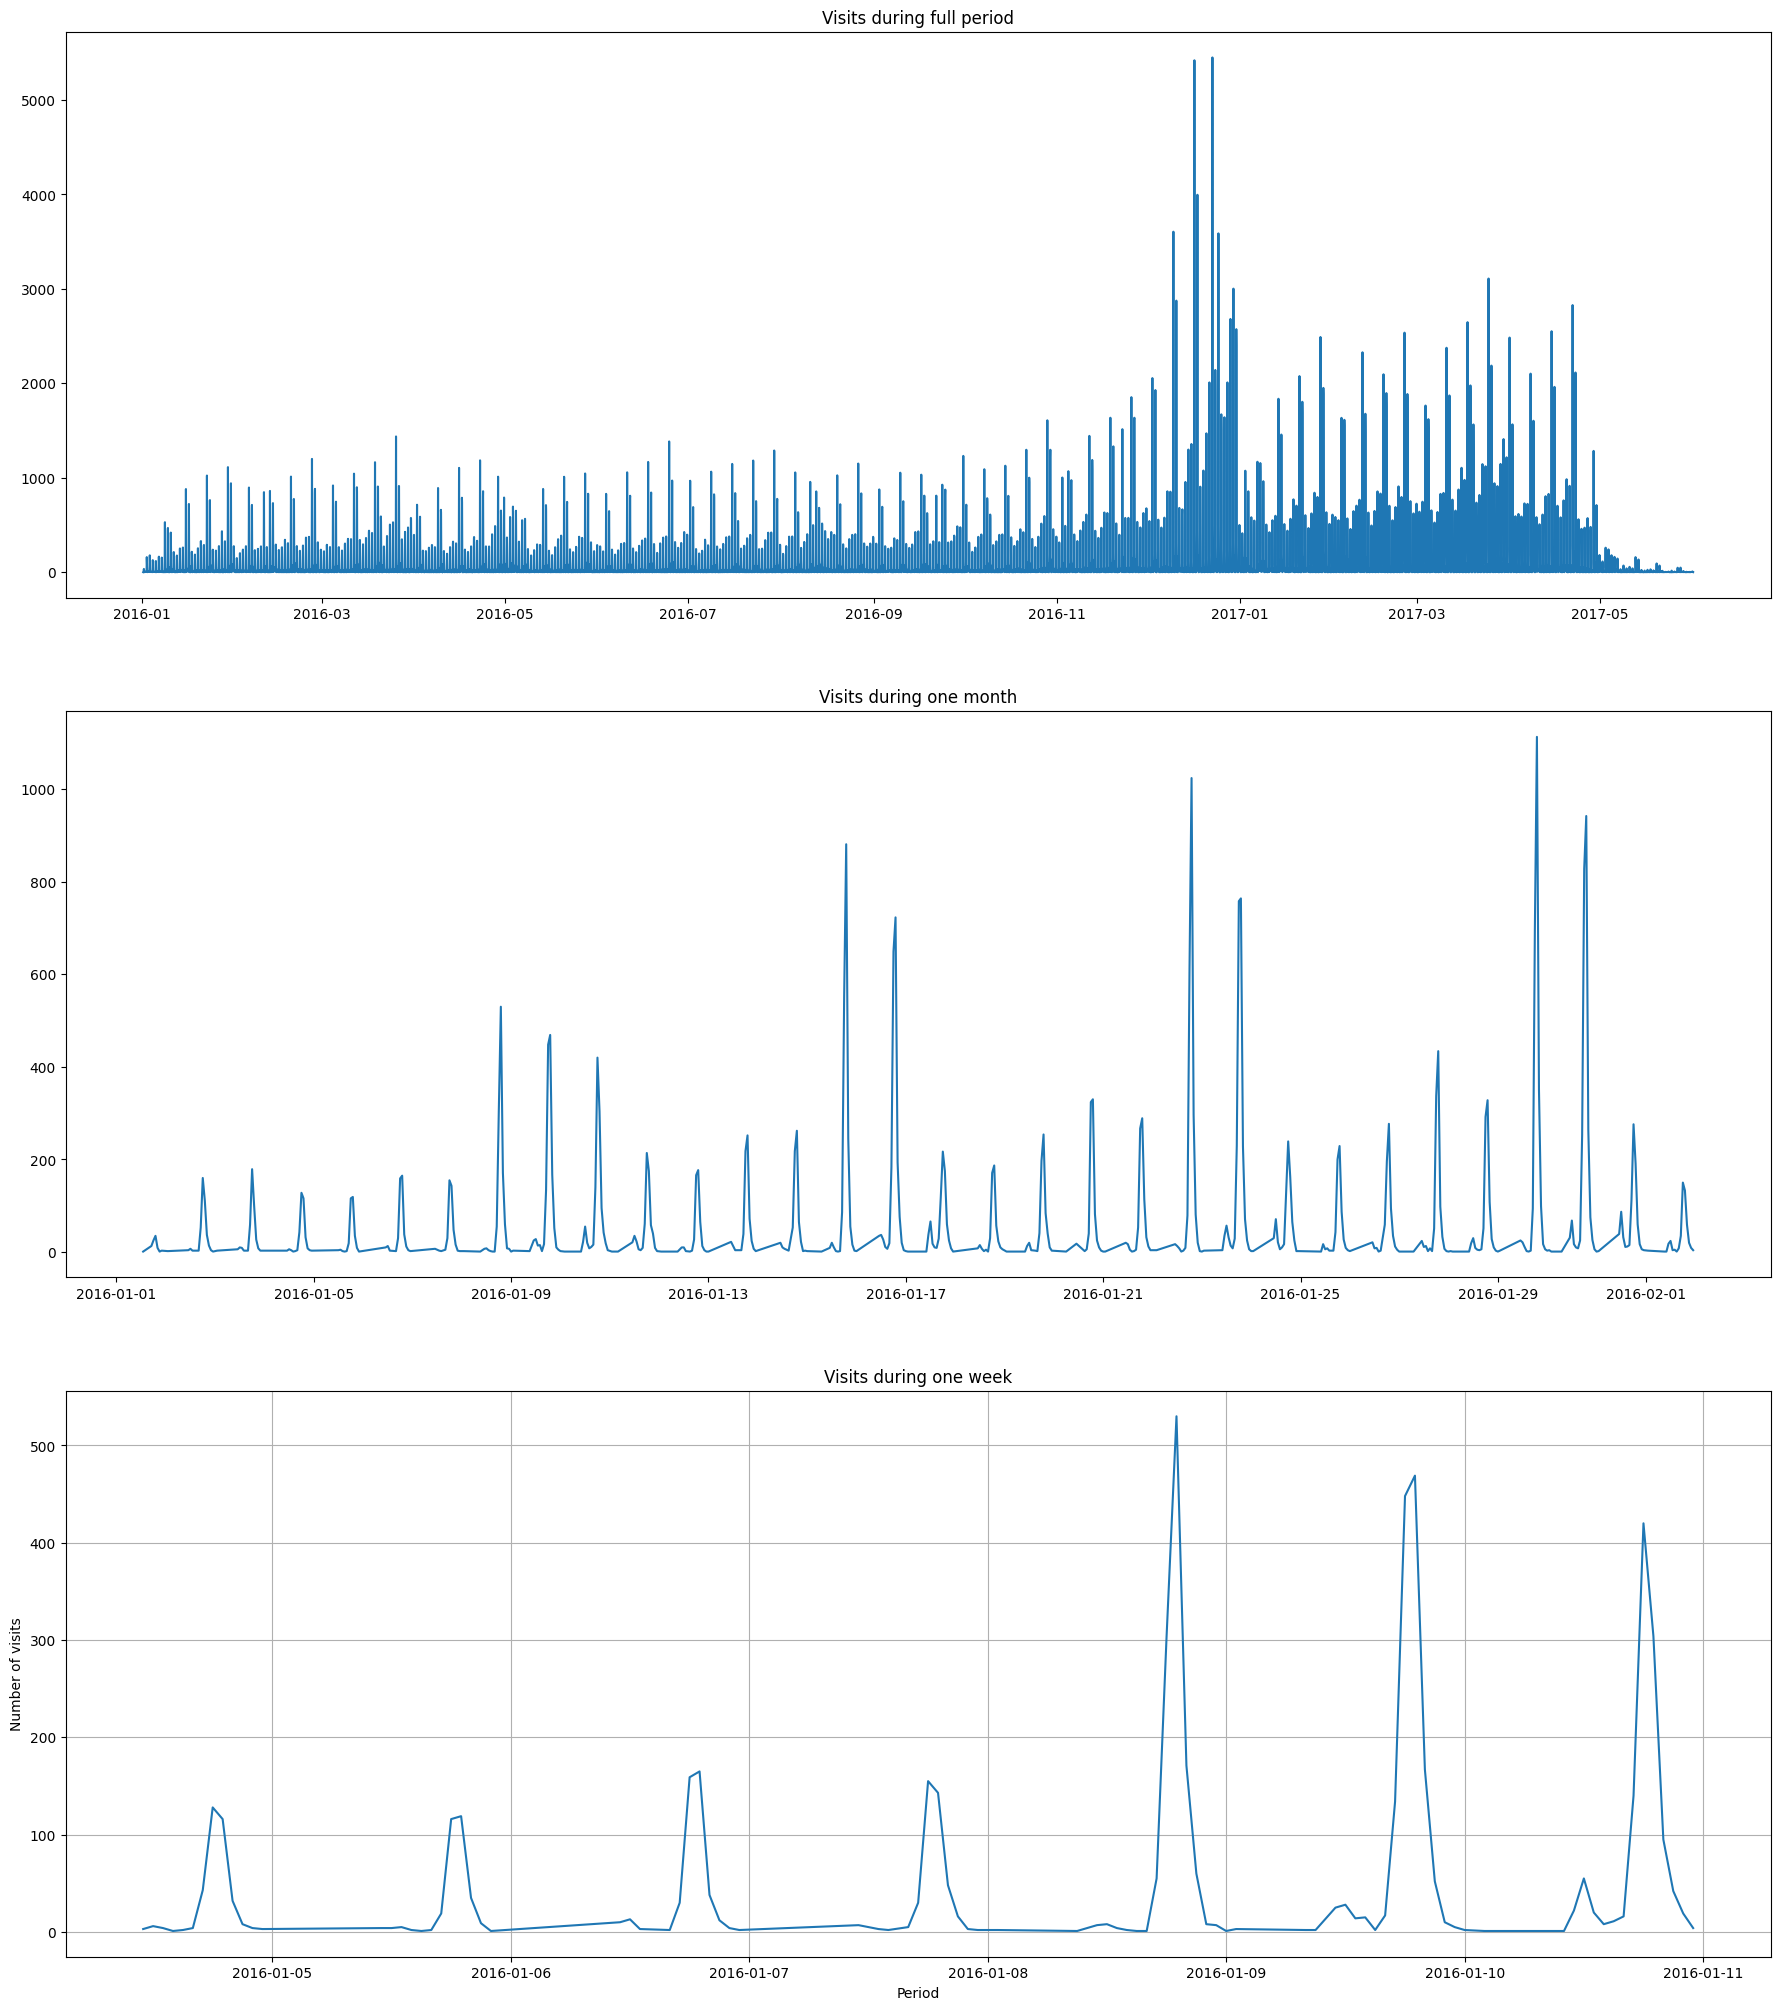

In [20]:
fullhist = full.groupby(['visit_datetime'],as_index=False).count().sort_values(by=['visit_datetime'])
fullhist_mnth = fullhist.loc[fullhist['visit_datetime'] <= pd.to_datetime('2016-02-01 23:59:00')]
fullhist_week = fullhist.loc[(fullhist['visit_datetime'] >= pd.to_datetime('2016-01-04 00:00:00')) \
                            & (fullhist['visit_datetime'] <= pd.to_datetime('2016-01-10 23:59:00'))]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(22,25))
ax1.plot(fullhist.visit_datetime, fullhist.store_id)
ax1.set_title("Visits during full period")
plt.ylabel("Number of visits")
plt.grid(True)

ax2.plot(fullhist_mnth.visit_datetime, fullhist_mnth.store_id)
ax2.set_title("Visits during one month")
plt.ylabel("Number of visits")
plt.grid(True)

ax3.plot(fullhist_week.visit_datetime, fullhist_week.store_id)
ax3.set_title("Visits during one week")
plt.ylabel("Number of visits")

plt.xlabel("Period")
plt.grid(True)
plt.show()

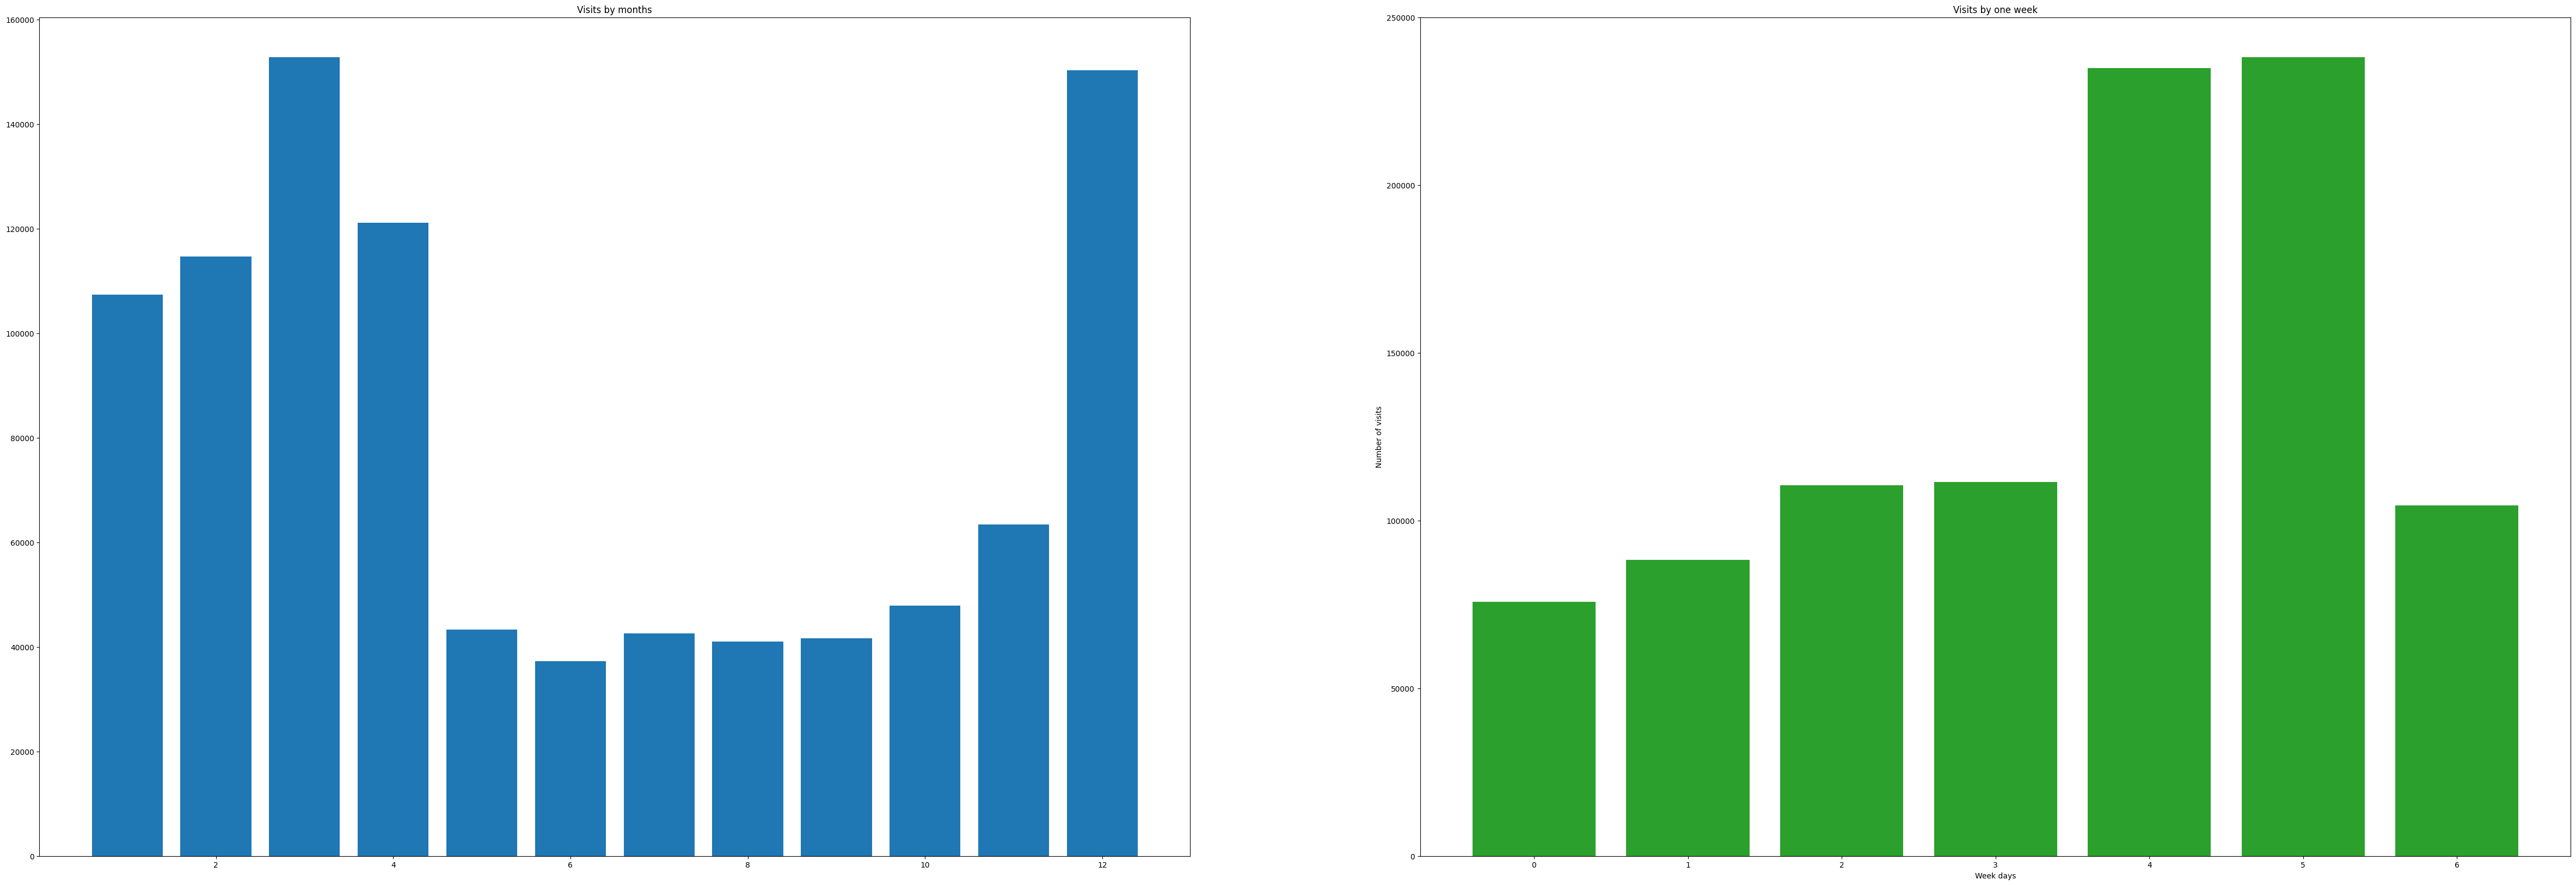

In [25]:
monthshist = full.groupby(['visit_month'],as_index=False).count().sort_values(by=['visit_month'])
weekshist = full.groupby(['visit_weekday'],as_index=False).count().sort_values(by=['visit_weekday'])
dayhist = full.groupby(['visit_time'],as_index=False).count().sort_values(by=['visit_time'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(60,20))

plt.ylabel("Number of visits")
ax1.bar(monthshist.visit_month, monthshist.store_id)
ax1.set_title("Visits by months")
plt.xlabel("Months")

ax2.bar(weekshist.visit_weekday, weekshist.store_id, color='C2')
ax2.set_title("Visits by one week")
plt.xlabel("Week days")


plt.show()

In [26]:
df['sample_submission']

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0
...,...,...
32014,air_fff68b929994bfbd_2017-05-27,0
32015,air_fff68b929994bfbd_2017-05-28,0
32016,air_fff68b929994bfbd_2017-05-29,0
32017,air_fff68b929994bfbd_2017-05-30,0
